
# Automated Email Report Generator (Python + SQL + SMTP)


### Import Libraries

- Along with pandas and matplotlib import smtplib to create a session to send emails.
- Also import classes from MIME library so that we can attach images to html


In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import smtplib
import codecs
from email.mime.text import MIMEText 
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

In [2]:
result = pd.read_csv("Data\\results\\order_etotal.csv")
# order_lines = pd.read_csv("Data\\order_lines.csv")
result_1 = result[:10]

### Create Bar Plots

- First is between total carbon emitted per order number
- Second is betweeen carbon emitter per freight transport per month


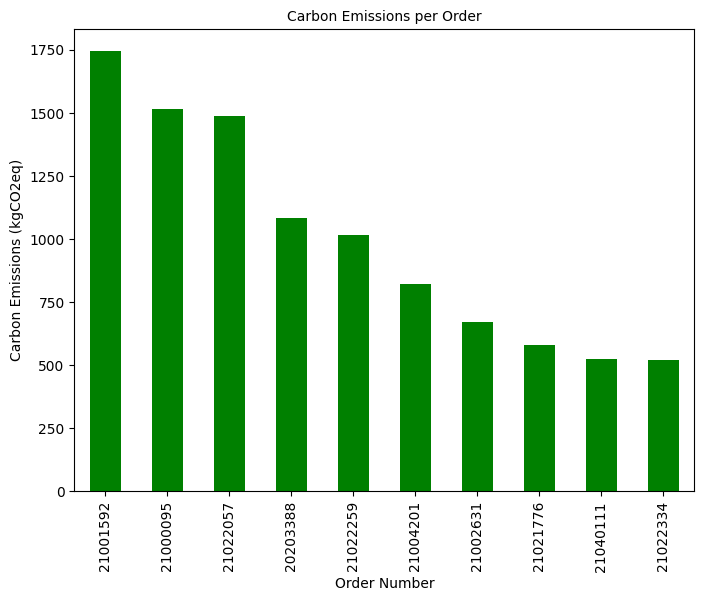

In [3]:
#bar plot
#calculate the total carbon emissions per order
fig, ax = plt.subplots(figsize=(12, 8))
result_1.plot.bar(figsize=(8,6) ,x='Order Number', y='etotal', color='green', legend=False,ax=ax)
plt.xlabel('Order Number',fontsize=10)  
plt.ylabel('Carbon Emissions (kgCO2eq)', fontsize=10)
plt.title('Carbon Emissions per Order',fontsize=10)
plt.show()
fig.savefig('Data\\results\\carbon_emissions_per_order.png', bbox_inches='tight')
filename1 = 'Data\\results\\carbon_emissions_per_order.png';

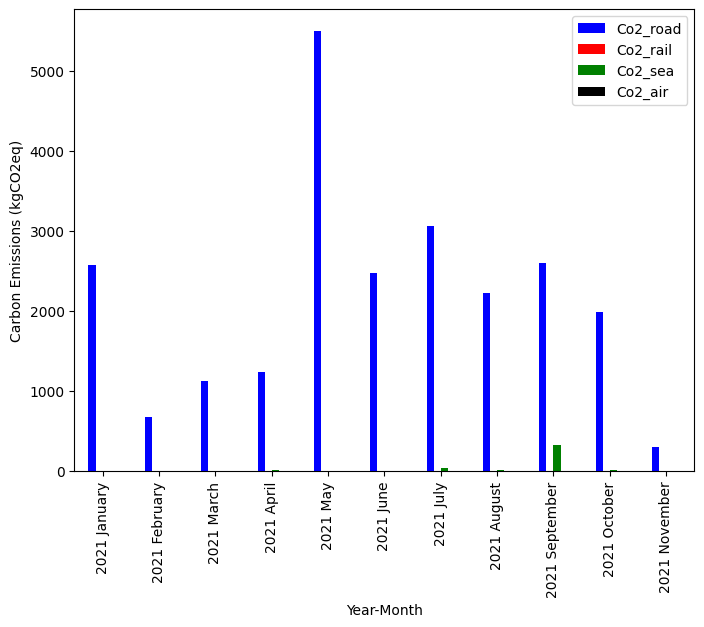

In [5]:
#calculate the total carbon emissions per month
result2 = pd.read_csv("Data\\results\\emissionbymonthl.csv")
result2
fig, ax = plt.subplots(figsize=(12, 8))
result2.plot.bar(figsize=(8,6), x='yearm_char', y=['Co2_road','Co2_rail','Co2_sea','Co2_air'], color=['blue','red','green','black'], legend=True, ax=ax)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Carbon Emissions (kgCO2eq)',fontsize=10)
plt.show()
fig.savefig('Data\\results\\emissionbymonth.png',  bbox_inches="tight")
filename2 = 'Data\\results\\emissionbymonth.png';

### Extracting Insights

- Here I've just taken out the maximum carbon emitter per order and in which month there was maximum carbon emitted


In [10]:
#Insights
dab = result_1.at[0,'Order Number']
result2.sort_values(by='Co2_road', inplace=True, ascending=False)
dak = result2.at[0,'yearm_char']


### Creating SMTP Protocol

**IMPORTANT** pre-requisites you need to follow before using these. The recent policies have made direct login obsolete.

Follow these steps to set up an app password via 2FA authentication

- First, go to your gmail account and enable 2-Factor-Authentication
- Then go to "https://myaccount.google.com/u/4/apppasswords"
- Type your desired app name into the "app name" field and then generate the password
- Then use the app password inplace in "from_password"

**Everything's** good now!


In [ ]:
from_mail = 'sender_email'
from_password = 'app_password'
to_mail = "recipient_email"

# SMTP Server (example of gmail)
smtp_server = 'smtp.gmail.com'
smtp_port = 587

In [44]:
# Create the email content
msg = MIMEMultipart()
msg['From'] = from_mail
msg['To'] = to_mail
msg['Subject'] = 'Carbon Emissions Report'

with open(filename1, 'rb') as f:
    img = MIMEImage(f.read())
    img.add_header('Content-Disposition', 'attachment1',filename='carbon_emissions_per_order.png')
    img.add_header('X-Attachment-Id', '0')
    img.add_header('Content-ID', '<0>')
    f.close
    msg.attach(img)
with open(filename2, 'rb') as f:
    img = MIMEImage(f.read())
    img.add_header('Content-Disposition', 'attachment1',filename='emissionbymonth.png')
    img.add_header('X-Attachment-Id', '1')
    img.add_header('Content-ID', '<1>')
    f.close()
    msg.attach(img)

f = codecs.open("email_report.html", "r")
string = f.read()

html_string = string.replace("html_image1", "cid:0")
html_string = html_string.replace("html_image2", "cid:1")
html_string = html_string.replace("order_number", dab.astype(str))
html_string = html_string.replace("yearm", dak)
msg.attach(MIMEText(html_string, 'html', 'utf-8'))



In [45]:
server = smtplib.SMTP("smtp.gmail.com", 587)
server.starttls()
server.login(from_mail, from_password)
server.sendmail(from_mail, to_mail, msg.as_string())
server.quit()

(221,
 b'2.0.0 closing connection d2e1a72fcca58-7482b0c0629sm3001923b3a.112 - gsmtp')